# Distributions

In this notebook, we calculate distributions such as the following:
* the distribution of the number of papers per author,
* the distribution of the number of authors per paper,
* the distribution of the number of collaborators per author.

We only consider a collaboration network in the domain of computer science
based on publications between the years 1990 and 2018.

In [1]:
from pfe.parse import publications_in

publications = publications_in('COMP', between=(1990, 2018))
publications = list(publications)

An example of a JSON publication.

In [2]:
publications[0]

{'id': 'SCOPUS_ID:0025593898',
 'date': '1990-12-15',
 'authors': [{'id': '7003786915',
   'name': 'Elbaz M.',
   'affiliation_id': '60027814',
   'affiliation_city': 'Mulhouse',
   'affiliation_country': 'France'},
  {'id': '6603564868',
   'name': 'Spehner J.',
   'affiliation_id': '60027814',
   'affiliation_city': 'Mulhouse',
   'affiliation_country': 'France'}]}

Then, we construct a collaboration graph based on the publications.
Nodes of a graph represent authors, and there is an edge between two authors if
they collaborated on a paper.

The graph is represented as a `networkx.Graph`.

In [3]:
from pfe.parse import parse

graph = parse(publications)

## Distribution of the Number of Authors per Publication

Failed to find a Ghostscript installation.  Distillation step skipped.
D:\Projects\pfe\src\pfe\misc\plot.py:142: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


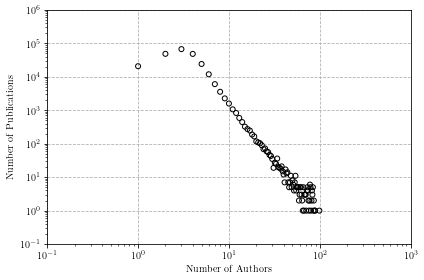

In [4]:
from pfe.tasks.distributions import authors_per_publication
from pfe.misc.plot import Plot

distribution = authors_per_publication(publications)

plot = Plot(tex=True)
plot.scatter(distribution)

plot.x.label('Number of Authors')
plot.x.scale('log')
plot.x.limit(10**-1, 10**3)

plot.y.label('Number of Publications')
plot.y.scale('log')
plot.y.limit(10**-1, 10**6)

plot.save('COMP-app.eps')

## Distribution of the Number of Publications per Author

Failed to find a Ghostscript installation.  Distillation step skipped.
D:\Projects\pfe\src\pfe\misc\plot.py:142: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


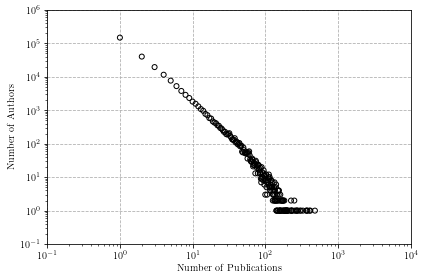

In [5]:
from pfe.tasks.distributions import publications_per_author
from pfe.misc.plot import Plot

distribution = publications_per_author(publications)

plot = Plot(tex=True)
plot.scatter(distribution)

plot.x.label('Number of Publications')
plot.x.scale('log')
plot.x.limit(10**-1, 10**4)

plot.y.label('Number of Authors')
plot.y.scale('log')
plot.y.limit(10**-1, 10**6)

plot.save('COMP-ppa.eps')

## Distribution of the Number of Collaborators per Author

This distribution is, in fact, the degree distribution
of the constructed collaboration graph.

In [5]:
...